#### Import Module

In [19]:
import os
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

#### Plot 3d Scatter Plot

In [3]:
# the selected properties: logP, tPSA, QED

property_list = ['logP', 'tPSA', 'QED']

# csv file of the molecular properties in the train set

file_path = '/fileserver-gamma/chaoting/ML/dataset/moses/raw/train/prop_temp.csv'

# read the csv file

df = pd.read_csv(file_path)
df = df[property_list]
df.head()

,logP,tPSA,QED
0,1.68070,87.31,0.896898
1,3.72930,44.12,0.862259
2,2.29702,91.68,0.701022
3,-2.21310,102.28,0.646083
4,0.80710,70.00,0.853457


In [7]:
def plot3d(property_list, data, s=1, alpha=0.75, cmap='BuGn',
           levels=20, ax_limits=None, ngrids=20j):
    assert len(property_list) == 3

    if ax_limits == None:
        ax_limits = {
            property_list[0]: [np.floor(data[property_list[0]].min()),
                                   np.ceil(data[property_list[0]].max())],
            property_list[1]: [np.floor(data[property_list[1]].min()),
                                   np.ceil(data[property_list[1]].max())],
            property_list[2]: [np.floor(data[property_list[2]].min()),
                                   np.ceil(data[property_list[2]].max())]
        }

    xmin = ax_limits[property_list[0]][0]
    xmax = ax_limits[property_list[0]][1]
    ymin = ax_limits[property_list[1]][0]
    ymax = ax_limits[property_list[1]][1]
    zmin = ax_limits[property_list[2]][0]
    zmax = ax_limits[property_list[2]][1]

    x, y, z = np.mgrid[xmin:xmax:ngrids,
                       ymin:ymax:ngrids,
                       zmin:zmax:ngrids]

    # Convert DataFrame to Numpy array
    data = data.to_numpy().T

    # Compute kernel density
    kernel = sp.stats.gaussian_kde(data)
    positions = np.vstack((x.ravel(), y.ravel(), z.ravel()))
    density = np.reshape(kernel(positions).T, x.shape)

    d1, d2, d3 = np.unravel_index(density.argmax(), density.shape)
    highest_freq_values = [x[d1,d2,d3], y[d1,d2,d3], z[d1,d2,d3]]

    # plot data

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(15, 15)
    
    ax.scatter(data[0, :], data[1, :], data[2, :], s=s, marker='o', c='k')

    ax.set_xlabel(property_list[0], fontsize=32)
    ax.set_ylabel(property_list[1], fontsize=32)
    ax.set_zlabel(property_list[2], fontsize=32)

    ax.xaxis.labelpad = 26
    ax.yaxis.labelpad = 26
    ax.zaxis.labelpad = 26

    ax.tick_params(axis='x', labelsize=24)
    ax.tick_params(axis='y', labelsize=24)
    ax.tick_params(axis='z', labelsize=24)

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    
    print('plot projection of density onto x-axis')

    plotdat = np.sum(density, axis=0)  # summing up density along z-axis
    plotdat = plotdat / np.max(plotdat)
    ploty, plotz = np.mgrid[ymin:ymax:ngrids, zmin:zmax:ngrids]
    
    colorx = ax.contourf(plotdat, ploty, plotz, levels=levels,
                        alpha=alpha, cmap=cmap, offset=xmin, zdir='x')

    print('plot projection of density onto y-axis')

    plotdat = np.sum(density, axis=1)  # summing up density along y-axis
    plotdat = plotdat / np.max(plotdat)
    plotx, plotz = np.mgrid[xmin:xmax:ngrids, zmin:zmax:ngrids]
    colory = ax.contourf(plotx, plotdat, plotz, levels=levels,
                        alpha=alpha, cmap=cmap, offset=ymax, zdir='y')

    print('plot projection of density onto z-axis')
    
    plotdat = np.sum(density, axis=2)
    plotdat = plotdat / np.max(plotdat)
    plotx, ploty = np.mgrid[xmin:xmax:ngrids, ymin:ymax:ngrids]
    colorz = ax.contourf(plotx, ploty, plotdat, levels=levels,
                        alpha=alpha, cmap=cmap, offset=zmin, zdir='z')

    cbar = fig.colorbar(colorx, ax=ax, shrink=0.5, pad=0.1)
    cbar.ax.tick_params(labelsize=20)

    plt.tight_layout()
    # fig.savefig(figpath)
    
    return highest_freq_values

plot projection of density onto x-axis
plot projection of density onto y-axis
plot projection of density onto z-axis
highest frequency of logP: 2.8421052631578947
highest frequency of tPSA: 57.0
highest frequency of QED: 0.8421052631578947


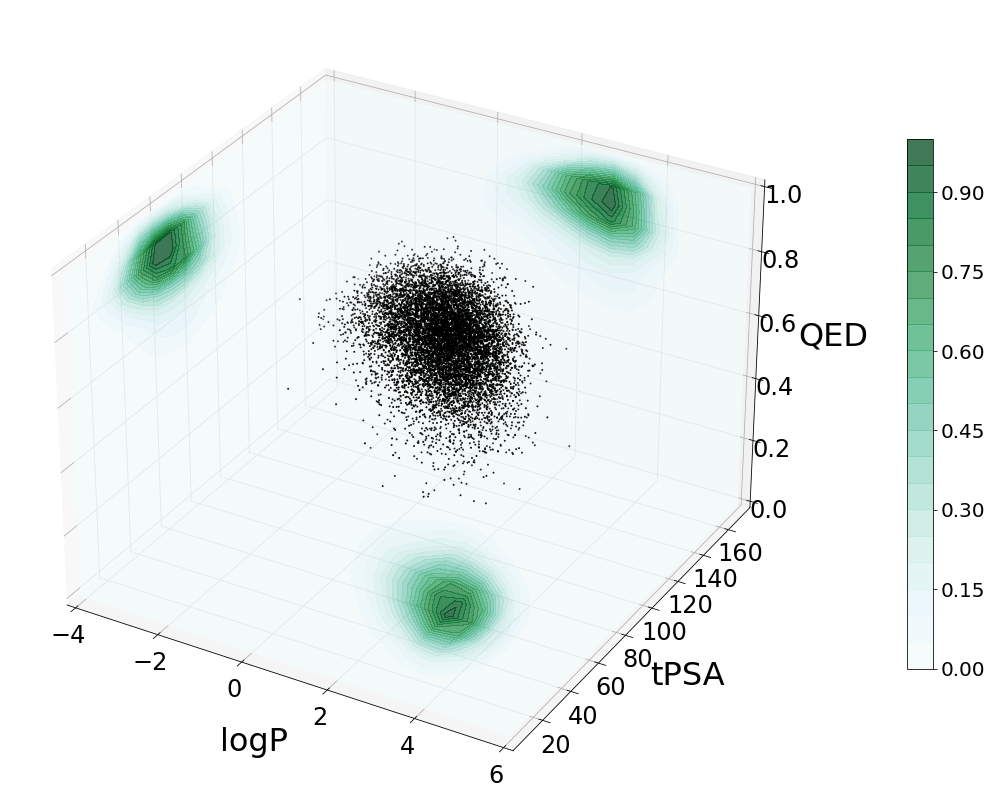

In [8]:
# plot 3d figure

samples = df.sample(n=10000)
highest_freq_values = plot3d(property_list, samples)

# get highest frequency of the properties

for i, p in enumerate(property_list):
    print(f'highest frequency of {p}: {highest_freq_values[i]}')

#### Plot Scatter Matrix

In [15]:
file_path = "/fileserver-gamma/chaoting/ML/dataset/moses/raw/train/prop_temp.csv"

df = pd.read_csv(file_path)
df = df[property_list]
df.head()

,logP,tPSA,QED
0,1.68070,87.31,0.896898
1,3.72930,44.12,0.862259
2,2.29702,91.68,0.701022
3,-2.21310,102.28,0.646083
4,0.80710,70.00,0.853457


In [17]:
def scatter_matrix(df, dpi=150):
    fig, axes = plt.subplots(figsize=(5.5, 5.3), dpi=dpi)
    scatter_matrix = pd.plotting.scatter_matrix(
        df,
        ax=axes,
        alpha=0.6,
        diagonal='kde',
        s=2
    )
    corr = df.corr().to_numpy()

    [ax.set_xticklabels(ax.get_xticks(), rotation=0) for ax in scatter_matrix.reshape(-1)]

    for i, j in zip(*np.triu_indices_from(scatter_matrix, k=1)):
        scatter_matrix[i, j].annotate(
            "%.3f" % corr[i, j],
            (0.8, 0.90),
            xycoords='axes fraction',
            ha='center',
            va='center'
        )

    plt.tight_layout()

<ipython-input-17-2633e431b178>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  scatter_matrix = pd.plotting.scatter_matrix(
<ipython-input-17-2633e431b178>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  [ax.set_xticklabels(ax.get_xticks(), rotation=0) for ax in scatter_matrix.reshape(-1)]


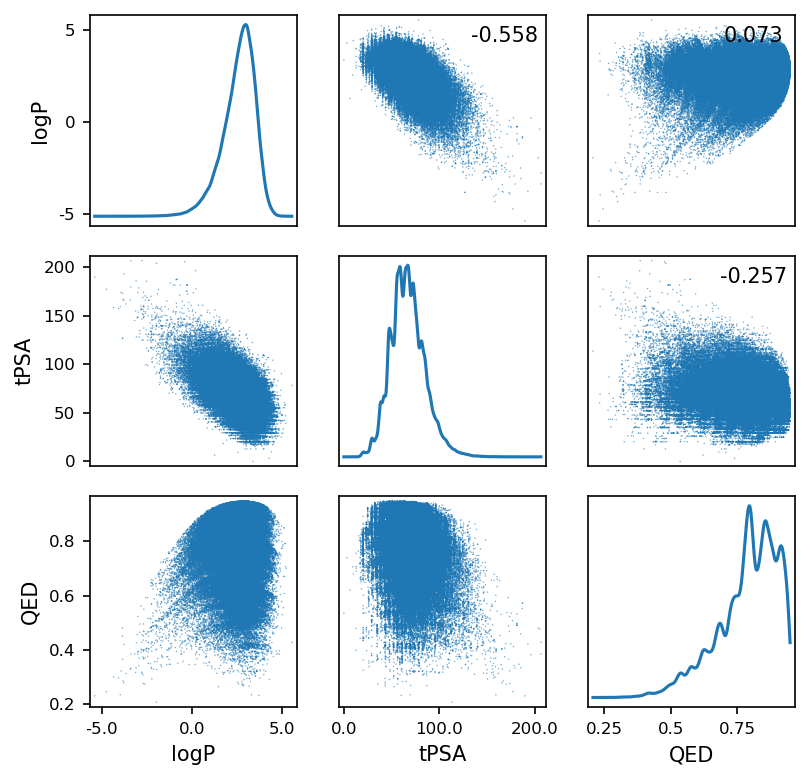

In [18]:
# plot scatter matrix

samples = df[:200000]
scatter_matrix(samples)